# Visualizer for presentations
This produces some visualizations, highlighting the relationship between VO2 and other sensors.

In [117]:
# Imports, visualization tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
# Definitions
dataset_dir = 'dataset'
person = 'P01'
VO2_average_data = pd.read_csv(dataset_dir + '/' + person + '/' + 'VO2' + '/' 'DataAverage.csv')
print(VO2_average_data.head())

   Time[s] Time[hh:mm:ss]  VO2[mL/kg/min]  VO2[mL/min]  HR[bpm]  Rf[bpm]  \
0        1       00:00:01            0.00         0.00      101     0.00   
1        2       00:00:02            0.00         0.00      101     0.00   
2        3       00:00:03            6.81       470.17      101    20.75   
3        4       00:00:04            6.81       470.17      100    20.75   
4        5       00:00:05            7.12       491.33      100    18.55   

   Tv[L]  Ve[L/min]  Ve/VO2  FeO2[%]  Pressure[hPa]  Temp[C]  HUM[%RH]  \
0   0.00       0.00    0.00     0.00            0.0     0.00      0.00   
1   0.00       0.00    0.00     0.00            0.0     0.00      0.00   
2   0.68      14.21   30.22    16.14         1000.1    22.97     39.78   
3   0.68      14.21   30.22    16.14         1000.1    22.97     39.78   
4   0.81      15.09   30.71    16.35         1000.3    22.98     39.79   

   RR[ms]                 Time  
0  597.66  2021-12-03 16:58:51  
1  610.84  2021-12-03 16:58:52  

Text(0.5, 1.0, 'VO2 average data for P01')

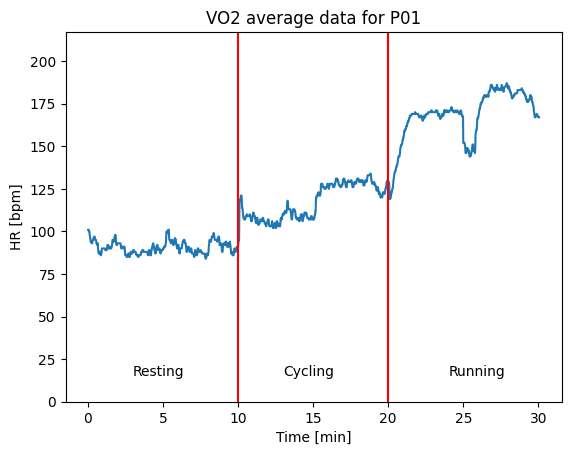

In [119]:
# Plot V02 average data, with Time[s] on x axis and HR[bpm] on y axis
# Show minutes on x axis instead of seconds for better visualization. Convert seconds to minutes by dividing by 60 and str->int
plt.plot(VO2_average_data['Time[s]'].astype(int)/60, VO2_average_data['HR[bpm]'])
# Draw vertical lines for each 10 minutes (resting, cycling, running)
plt.axvline(x=10, color='r')
plt.axvline(x=20, color='r')
# Add a title for each 10-minute interval to the plot
plt.text(3, 15, 'Resting')
plt.text(13, 15, 'Cycling')
plt.text(24, 15, 'Running')
# Set the y axis range upper limit to y_max+20
y_max = VO2_average_data['HR[bpm]'].max() + 10
plt.ylim(0, y_max+20)
plt.xlabel('Time [min]')
plt.ylabel('HR [bpm]')
plt.title('VO2 HR average data for ' + person)

Text(0.5, 1.0, 'VO2 average data for P01')

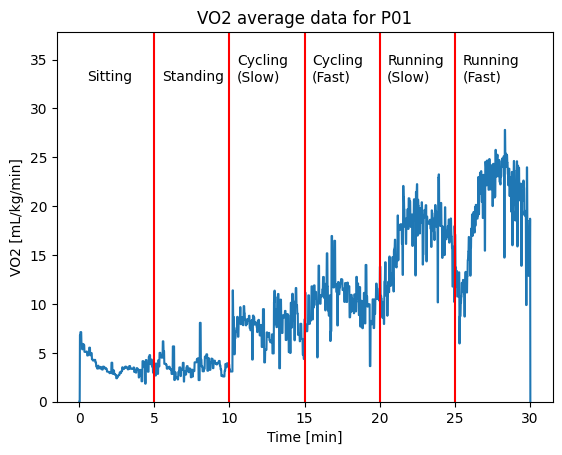

In [120]:
# Next, similar plot but with VO2[mL/kg/min] on y axis
plt.figure()
plt.plot(VO2_average_data['Time[s]'].astype(int)/60, VO2_average_data['VO2[mL/kg/min]'])
plt.axvline(x=5, color='r')
plt.axvline(x=10, color='r')
plt.axvline(x=15, color='r')
plt.axvline(x=20, color='r')
plt.axvline(x=25, color='r')
y_max = VO2_average_data['VO2[mL/kg/min]'].max() + 5
plt.text(0.5, y_max, 'Sitting')
plt.text(5.5, y_max, 'Standing')
plt.text(10.5, y_max, 'Cycling\n(Slow)')
plt.text(15.5, y_max, 'Cycling\n(Fast)')
plt.text(20.5, y_max, 'Running\n(Slow)')
plt.text(25.5, y_max, 'Running\n(Fast)')
plt.ylim(0, y_max+5)
# Dashed lines for every 5 min (intensity level), with ylim from 0 to y_max+5
plt.xlabel('Time [min]')
plt.ylabel('VO2 [mL/kg/min]')
plt.title('VO2 average data for ' + person)


Sample rate: 32.0
      x    y     z
2  19.0  0.0  59.0
3  19.0  1.0  61.0
4  20.0  1.0  60.0
5  20.0  0.0  60.0
6  19.0  0.0  60.0


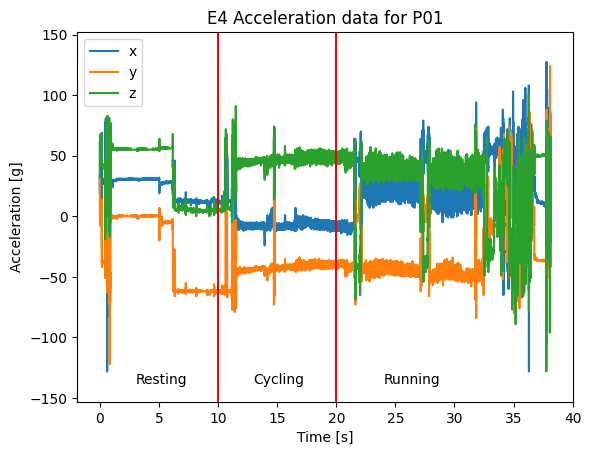

In [121]:
E4_ACC_data = pd.read_csv(dataset_dir + '/' + person + '/' + 'E4' + '/' 'ACC.csv')
# Rename the columns to x, y, z
E4_ACC_data.columns = ['x', 'y', 'z']
# E4 Acc data's first row is unix timestamp (discard), and second row is sample rate (read, and then discard)
# The rest of the rows are the acceleration data. 3 columns in total
sample_rate = E4_ACC_data.iloc[0, 0]
print('Sample rate: ' + str(sample_rate))
time = np.arange(0, len(E4_ACC_data)) / sample_rate
# To minutes
time = time / 60
# Make sure the time array has the same length as the acceleration data
x = E4_ACC_data['x']
y = E4_ACC_data['y']
z = E4_ACC_data['z']
E4_ACC_data = E4_ACC_data.iloc[2:, :]
print(E4_ACC_data.head())
# Plot the acceleration columns (x, y, z) against time
plt.figure()
plt.plot(time, x, label='x')
plt.plot(time, y, label='y')
plt.plot(time, z, label='z')
# Vertical lines for each 10 minutes
plt.axvline(x=10, color='r')
plt.axvline(x=20, color='r')
# Add a title for each 10-minute interval to the plot
y_max = E4_ACC_data['x'].max() + 25
y_min = E4_ACC_data['x'].min() - 25
plt.ylim(y_min, y_max)
plt.text(3, y_min+15, 'Resting')
plt.text(13, y_min+15, 'Cycling')
plt.text(24, y_min+15, 'Running')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')
plt.title('E4 Acceleration data for ' + person)
plt.legend() 

Sample rate: 64.0
   BVP
2 -0.0
3 -0.0
4 -0.0
5 -0.0
6 -0.0


Text(0.5, 1.0, 'E4 BVP data for P01')

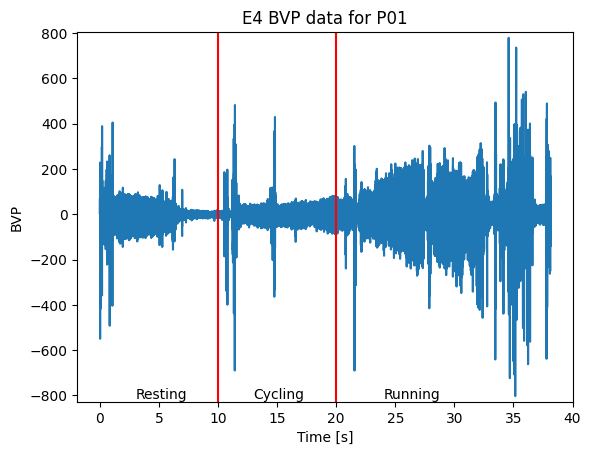

In [122]:
# E4 BVP data
E4_BVP_data = pd.read_csv(dataset_dir + '/' + person + '/' + 'E4' + '/' 'BVP.csv')
# Rename the column to BVP
E4_BVP_data.columns = ['BVP']
# BVP data's first row is unix timestamp (discard), and second row is sample rate (read, and then discard)
# The rest of the rows are the BVP data. 1 column in total
sample_rate = E4_BVP_data.iloc[0, 0]
print('Sample rate: ' + str(sample_rate))
time = np.arange(0, len(E4_BVP_data)) / sample_rate
# To minutes
time = time / 60
# Make sure the time array has the same length as the BVP data 
BVP = E4_BVP_data['BVP']
E4_BVP_data = E4_BVP_data.iloc[2:, :]
print(E4_BVP_data.head())
# Plot the BVP column against time
plt.figure()
plt.plot(time, BVP)
# Vertical lines for each 10 minutes
plt.axvline(x=10, color='r')
plt.axvline(x=20, color='r') 
# Add a title for each 10-minute interval to the plot
y_max = E4_BVP_data['BVP'].max() + 25
y_min = E4_BVP_data['BVP'].min() - 25
plt.ylim(y_min, y_max)
plt.text(3, y_min+15, 'Resting')
plt.text(13, y_min+15, 'Cycling')
plt.text(24, y_min+15, 'Running')
plt.xlabel('Time [s]')
plt.ylabel('BVP')
plt.title('E4 BVP data for ' + person)


Sample rate: 4.0
        EDA
2  0.831534
3  1.175177
4  1.519903
5  1.520002
6  1.536659


Text(0.5, 1.0, 'E4 EDA data for P01')

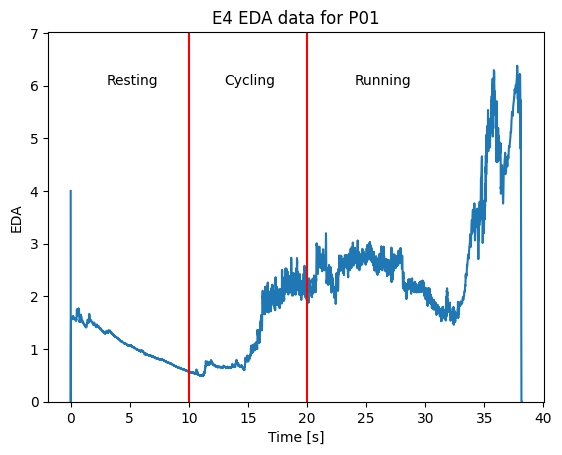

In [123]:
# E4 Electrodermal activity data
E4_EDA_data = pd.read_csv(dataset_dir + '/' + person + '/' + 'E4' + '/' 'EDA.csv')
# Rename the column to EDA
E4_EDA_data.columns = ['EDA']
# EDA data's first row is unix timestamp (discard), and second row is sample rate (read, and then discard)
# The rest of the rows are the EDA data. 1 column in total
sample_rate = E4_EDA_data.iloc[0, 0]
print('Sample rate: ' + str(sample_rate))
max_time = len(E4_EDA_data) / sample_rate
time = np.linspace(0, max_time, len(E4_EDA_data))
# To minutes
time = time / 60
# Make sure the time array has the same length as the EDA data
EDA = E4_EDA_data['EDA']
E4_EDA_data = E4_EDA_data.iloc[2:, :]
print(E4_EDA_data.head())
# Plot the EDA column against time
plt.figure()
plt.plot(time, EDA)
# Vertical lines for each 10 minutes
plt.axvline(x=10, color='r')
plt.axvline(x=20, color='r')
# Add a title for each 10-minute interval to the plot
y_max = E4_EDA_data['EDA'].max() * 1.1
y_min = E4_EDA_data['EDA'].min() * 0.9
plt.ylim(y_min, y_max)
plt.text(3, y_max - 1, 'Resting')
plt.text(13, y_max - 1, 'Cycling')
plt.text(24, y_max - 1, 'Running')
plt.xlabel('Time [s]')
plt.ylabel('EDA')
plt.title('E4 EDA data for ' + person)



Text(0.5, 1.0, 'VO2 average data and EDA (Skin Conductance) for P01')

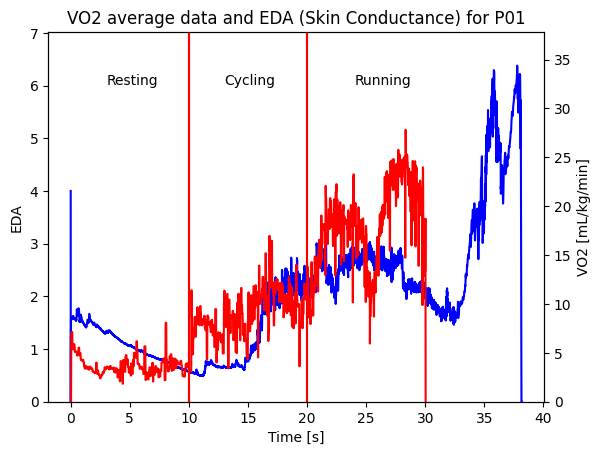

In [124]:
# Now EDA and VO2 in the same plot, in different y axes
plt.figure()
 
# Plot EDA
plt.plot(time, EDA, color='b')
# Vertical lines for each 10 minutes
plt.axvline(x=10, color='r')
plt.axvline(x=20, color='r')
# Add a title for each 10-minute interval to the plot
y_max = E4_EDA_data['EDA'].max() * 1.1
y_min = E4_EDA_data['EDA'].min() * 0.9
plt.ylim(y_min, y_max)
plt.text(3, y_max - 1, 'Resting')
plt.text(13, y_max - 1, 'Cycling')
plt.text(24, y_max - 1, 'Running')
plt.xlabel('Time [s]')
plt.ylabel('EDA')

# Plot VO2
plt.twinx()
plt.plot(VO2_average_data['Time[s]'].astype(int)/60, VO2_average_data['VO2[mL/kg/min]'], color='r')
plt.axvline(x=10, color='r')
plt.axvline(x=20, color='r')
y_max = VO2_average_data['VO2[mL/kg/min]'].max() + 5
plt.ylim(0, y_max+5)
# Dashed lines for every 5 min (intensity level), with ylim from 0 to y_max+5
plt.xlabel('Time [min]')
plt.ylabel('VO2 [mL/kg/min]')
plt.title('VO2 average data and EDA (Skin Conductance) for ' + person)



E4 HR timestamp: 1638550674.000000
E4 HR timestamp: 2021-12-03 16:57:36
VO2 timestamp: 2021-12-03 16:58:51
Sample rate: 1.0
      HR
2  58.00
3  56.00
4  55.00
5  60.60
6  64.33
Total seconds: 75.0
       HR
77  86.97
78  87.15
79  87.35
80  87.57
81  87.78
New length of HR data: 2203
New length of time array: 2203


C:\Users\tiitu\AppData\Local\Temp\ipykernel_7140\3037915161.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  E4_HR_timestamp = pd.to_datetime(E4_HR_timestamp, unit='s')


Text(0.5, 1.0, 'VO2 average data (ml/kg/min) and HR (bpm) for P01')

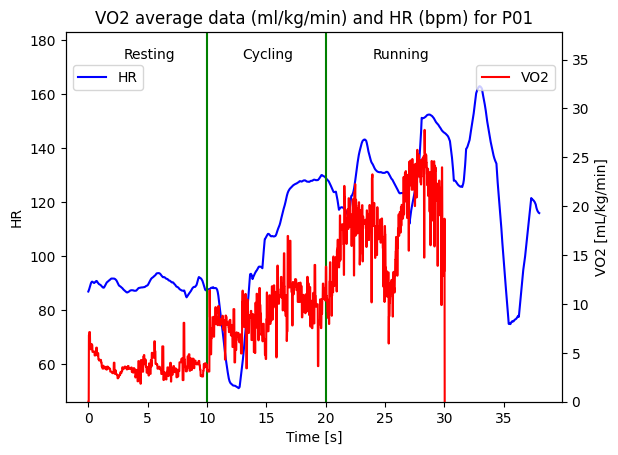

In [125]:
# Now E4 Heart rate (HR) and VO2 in the same plot, in different y axes
plt.figure()
ax = plt.subplot(111)
HR_data = pd.read_csv(dataset_dir + '/' + person + '/' + 'E4' + '/' 'HR.csv')
# Rename the column to HR
E4_HR_timestamp = HR_data.columns[0]
print('E4 HR timestamp: ' + str(E4_HR_timestamp))
# Convert to datetime
E4_HR_timestamp = pd.to_datetime(E4_HR_timestamp, unit='s')
print('E4 HR timestamp: ' + str(E4_HR_timestamp))

# Get the first timestamp from VO2 data column 'Time', which is a datetime
VO2_timestamp = VO2_average_data['Time'].iloc[0]
VO2_timestamp = pd.to_datetime(VO2_timestamp)
print('VO2 timestamp: ' + str(VO2_timestamp))

HR_data.columns = ['HR']
# HR data's first row is unix timestamp (discard), and second row is sample rate (read, and then discard)
# The rest of the rows are the HR data. 1 column in total
sample_rate = HR_data.iloc[0, 0]
print('Sample rate: ' + str(sample_rate))
max_time = len(HR_data) / sample_rate
time = np.linspace(0, max_time, len(HR_data))

HR_data = HR_data.iloc[2:, :]
print(HR_data.head())

# If timestamps do not match, then cut the start of the HR data to match the start of the VO2 data
if E4_HR_timestamp != VO2_timestamp:
    total_seconds = (VO2_timestamp - E4_HR_timestamp).total_seconds()
    print('Total seconds: ' + str(total_seconds))
    # Cut the start of the HR data to match the start of the VO2 data
    HR_data = HR_data.iloc[int(total_seconds):, :]
    # Reset the time array
    time = np.linspace(0, max_time, len(HR_data))
    print(HR_data.head())
    print('New length of HR data: ' + str(len(HR_data)))
    print('New length of time array: ' + str(len(time)))
    
HR = HR_data['HR']
# To minutes 
time = time / 60
# Make sure the time array has the same length as the HR data
# Plot the HR column against time
ax.plot(time, HR, color='b')
# Vertical lines for each 10 minutes
ax.axvline(x=10, color='g')
ax.axvline(x=20, color='g')
# Add a title for each 10-minute interval to the plot
y_max = HR_data['HR'].max() + 20
y_min = HR_data['HR'].min() - 5
plt.ylim(y_min, y_max)
ax.text(3, y_max - 10, 'Resting')
ax.text(13, y_max - 10, 'Cycling')
ax.text(24, y_max - 10, 'Running')
ax.legend(['HR'], loc='upper left', bbox_to_anchor=(0, 0.93))
plt.xlabel('Time [s]')
plt.ylabel('HR')

# Plot VO2
ax2 = plt.twinx()
ax2.plot(VO2_average_data['Time[s]'].astype(int)/60, VO2_average_data['VO2[mL/kg/min]'], color='r')
y_max = VO2_average_data['VO2[mL/kg/min]'].max() + 5
ax2.legend(['VO2'], loc='upper right', bbox_to_anchor=(1, 0.93))
plt.ylim(0, y_max+5)
# Dashed lines for every 5 min (intensity level), with ylim from 0 to y_max+5
plt.xlabel('Time [min]')
plt.ylabel('VO2 [mL/kg/min]')
plt.title('VO2 average data (ml/kg/min) and HR (bpm) for ' + person)

